In [80]:
%reload_ext autoreload
%autoreload 2
from PCN_tanh import PCN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plyer import notification
from helpers import activation, der_activation, normalize

In [81]:
epochs = 300
sample_interval = np.ceil(epochs/15)

In [82]:
# Load data from iris and create training and test sets
iris = pd.read_csv('./data/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']).sample(frac=1)
y = iris['label']
X = iris.drop('label', axis=1)

# Converting labels from string to int
y = y.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Splitting the data into training and test sets
X_train = X.iloc[:110].to_numpy()
X_test = X.iloc[110:].to_numpy()
y_train = y.iloc[:110]
y_test = y.iloc[110:]

# Converting the labels to one-hot encoding
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [83]:
# Setting up PCN agent
agent = PCN(4, [6] ,3, learning_rate=0.05, max_iter=500)
# agent = PCN(4, [6] ,3, learning_rate=0.05, max_iter=500, activation=activation, der_activation=der_activation, normalize_function=normalize)

In [84]:
# Training the agent
print('Training the agent...')
agent_checkpoints = []
agent_train_checkpoints = []
agent_errors = []
agent_train_errors = []
for i in range(epochs):
    if not i % sample_interval:
        print(f'Epoch {i} of {epochs}...')
        _, accuracy, error = agent.test(X_test, y_test)
        _, accuracy_t, error_t = agent.test(X_train, y_train)
        agent_checkpoints.append(np.mean(accuracy))
        agent_train_checkpoints.append(np.mean(accuracy_t))
        agent_errors.append(error)
        agent_train_errors.append(error_t)
    agent.train(X_train, y_train)

Training the agent...
Epoch 0 of 300...
Epoch 20 of 300...
Epoch 40 of 300...
Epoch 60 of 300...
Epoch 80 of 300...
Epoch 100 of 300...
Epoch 120 of 300...
Epoch 140 of 300...
Epoch 160 of 300...
Epoch 180 of 300...
Epoch 200 of 300...
Epoch 220 of 300...
Epoch 240 of 300...
Epoch 260 of 300...
Epoch 280 of 300...


In [85]:
# Testing the agent
print('Testing the agent...')
pred, accuracy, _ = agent.test(X_train, y_train)
# print('Predictions: ', pred)
print(f'Training Accuracy: {accuracy:.3f}%')

Testing the agent...
Training Accuracy: 0.900%


In [86]:
# Testing the agent
print('Testing the agent...')
pred, accuracy, _ = agent.test(X_test, y_test)
# print('Predictions: ', pred)
print(f'Test Accuracy: {accuracy:.3f}%')

Testing the agent...
Test Accuracy: 0.825%


In [94]:
sub_preds = np.array(pred)[np.argmax(y_test, axis=1) != 0]
sub_sols = y_test[np.argmax(y_test, axis=1) != 0]
for example, solution in zip(sub_preds, sub_sols):
    temp = "❌" if np.argmax(example) != np.argmax(solution) else "✅"
    print(f'Example: {example}, Solution: {solution} {temp}')
print(f'Accuracy: {(np.argmax(sub_preds, axis=1) == np.argmax(sub_sols, axis=1)).sum() / sub_sols.sum():.3f}')

Example: [-0.25703098 -0.164832    0.52233132], Solution: [0 1 0] ❌
Example: [-0.14415221  0.77724861 -0.191397  ], Solution: [0 1 0] ✅
Example: [-0.3040321   0.53308399  0.28501222], Solution: [0 1 0] ✅
Example: [-0.40893722 -0.28242489  0.64286888], Solution: [0 0 1] ✅
Example: [-0.60808631  0.10991399 -0.18905328], Solution: [0 1 0] ✅
Example: [-0.10991942  0.49996653  0.64984905], Solution: [0 1 0] ❌
Example: [-0.49804766  0.32634661  0.28446972], Solution: [0 0 1] ❌
Example: [-0.41459509  0.23606207  0.51158472], Solution: [0 0 1] ✅
Example: [-0.47463965  0.37286004  0.45196798], Solution: [0 0 1] ✅
Example: [-0.25468428  0.48422379  0.51301219], Solution: [0 0 1] ✅
Example: [-0.4041623   0.28187053  0.20554991], Solution: [0 1 0] ✅
Example: [-0.5550185   0.12642891  0.59533516], Solution: [0 0 1] ✅
Example: [-0.45032422  0.18209662  0.46598143], Solution: [0 0 1] ✅
Example: [-0.69402579  0.36999342  0.31877   ], Solution: [0 0 1] ❌
Example: [-0.42723231  0.33849227  0.50981709], 

In [88]:
print("Accuracy per class:")
for i in range(3):
    print((np.argmax(pred, axis=1)[np.argmax(y_test, axis=1) == i] == i).sum() / np.sum(np.argmax(y_test, axis=1) == i))

Accuracy per class:
1.0
0.7692307692307693
0.6666666666666666


In [89]:
# Notification
notification.notify(
    title='Experiment Complete',
    message='The experiment has completed. Please check the graphs.',
    app_name='PCN',
    timeout=10
)

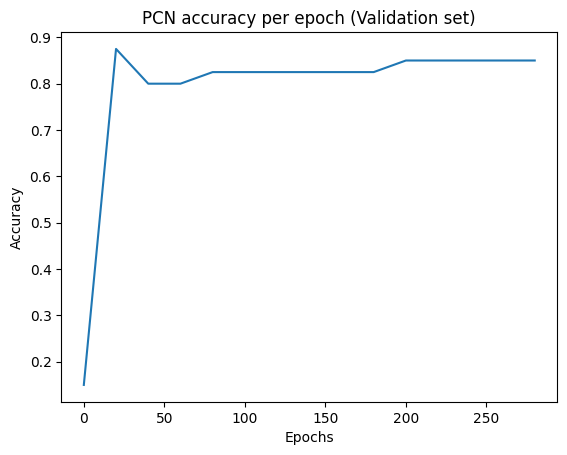

In [90]:
# Plotting the average accuracy of the agents
plt.plot(range(0, epochs, int(sample_interval)), agent_checkpoints)
plt.title('PCN accuracy per epoch (Validation set)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

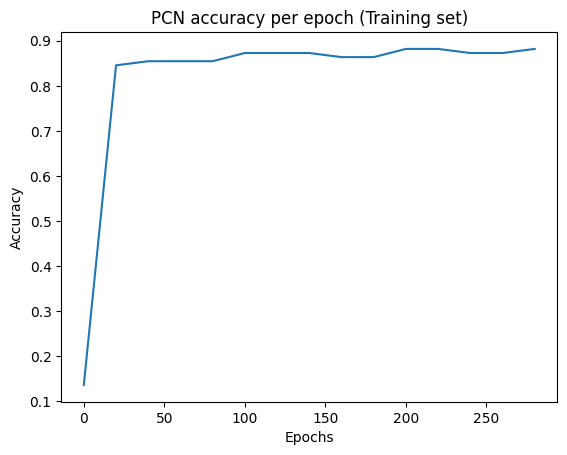

In [91]:
# Plotting the average accuracy of the agents
plt.plot(range(0, epochs, int(sample_interval)), agent_train_checkpoints)
plt.title('PCN accuracy per epoch (Training set)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

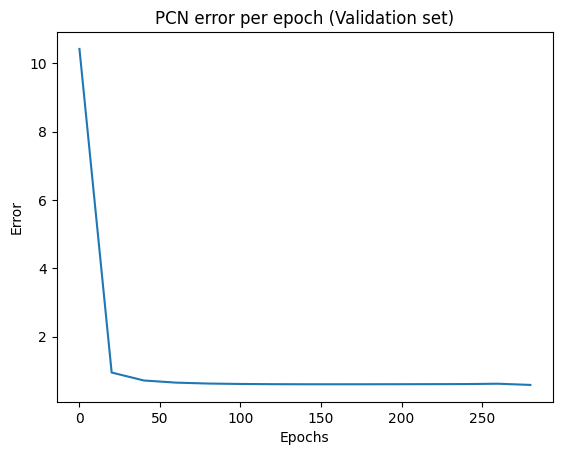

In [92]:
# Plotting the average error of the agents
plt.plot(range(0, epochs, int(sample_interval)), np.mean(agent_errors, axis=1))
plt.title('PCN error per epoch (Validation set)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

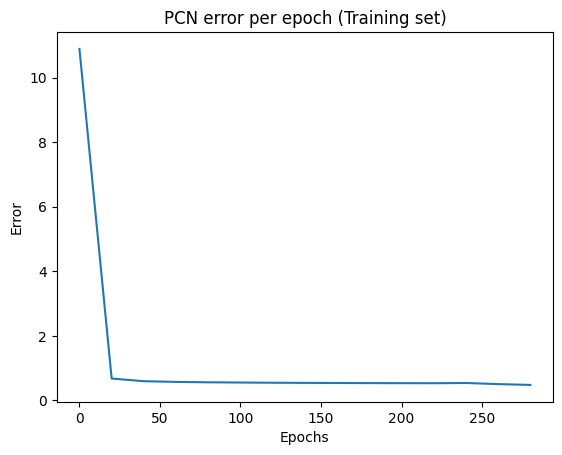

In [93]:
# Plotting the average error of the agents on the training set
plt.plot(range(0, epochs, int(sample_interval)), np.mean(agent_train_errors, axis=1))
plt.title('PCN error per epoch (Training set)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()